# Importing Libraries

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Creating Dataframe

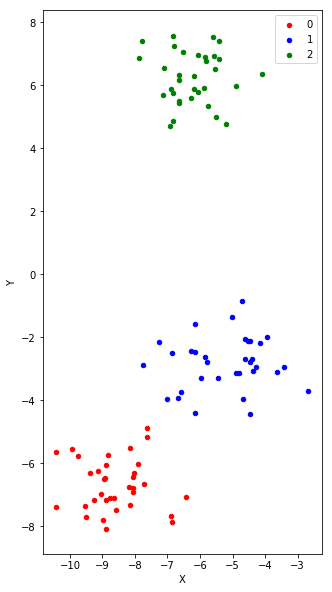

In [93]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=100, centers=3, n_features=2)
# scatter plot, dots colored by class value
df = pd.DataFrame(dict(X=X[:,0], Y=X[:,1], Label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('Label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='X', y='Y', label=key, color=colors[key])
plt.show()

In [94]:
df.head()

,X,Y,Label
0,-5.966934,-3.277410,1
1,-9.934176,-5.556315,0
2,-10.431403,-7.388513,0
3,-7.744777,-2.869924,1
4,-6.831545,4.857724,2


# Splitting the Dataframe(X(train,test),y(train,test))

In [95]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [96]:
X=df.iloc[:,0:2].values
y=df.iloc[:,-1].values
scaler=StandardScaler()
X=scaler.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


# Training the model with Decision Tree Algorithm

In [97]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()

In [98]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [99]:
y_pred=clf.predict(X_test)

In [100]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

# Plotting Decision Boundary with MeshGrid

In [101]:
a=np.arange(start=X_train[:,0].min()-1,stop=X_train[:,0].max()+1,step=0.01)
b=np.arange(start=X_train[:,1].min()-1,stop=X_train[:,1].max()+1,step=0.01)
XX,YY=np.meshgrid(a,b)
print(a.shape,b.shape,XX.shape,YY.shape)
arr=np.array([XX.ravel(),YY.ravel()]).T
print(arr.shape)

(648,) (486,) (486, 648) (486, 648)
(314928, 2)


In [102]:
labels=clf.predict(arr)

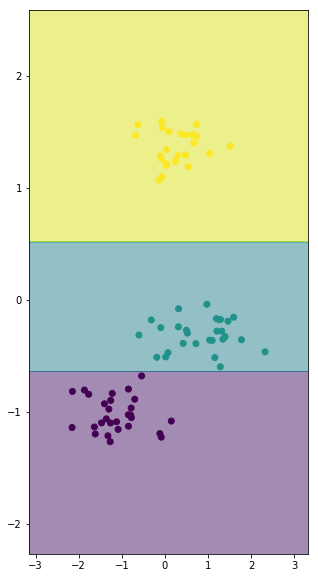

In [103]:
plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.50)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)

# Indentification of Best Hyper Parameters for overcoming the Overfitting and Underfitting

In [104]:
param_dist={"criterion":["gini","entropy"],"max_depth": [1,2,3,4,5,6,7,8,None]}

In [105]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(clf,param_grid=param_dist,cv=10,n_jobs=-1)

In [106]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, None]})

In [107]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=2)

In [108]:
grid.best_score_

0.975

In [109]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 2}

# Plotting the Tree to show the hyper parameter is the cause of overfitting and underfitting 

In [110]:
from sklearn.tree import plot_tree
from matplotlib.pyplot import rcParams

Enter the max_depth:1
Enter the criterion(gini/entropy):entropy


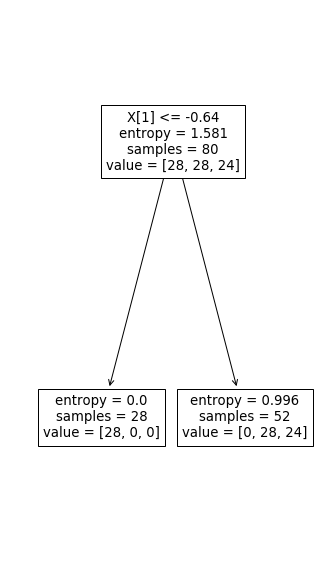

In [111]:
n=int(input("Enter the max_depth:"))
string=input("Enter the criterion(gini/entropy):")
clf=DecisionTreeClassifier(criterion=string,max_depth=n)
clf.fit(X_train,y_train)
rcParams['figure.figsize']=5,10
plot_tree(clf)
plt.show()

Enter the max_depth:2
Enter the criterion(gini/entropy):gini


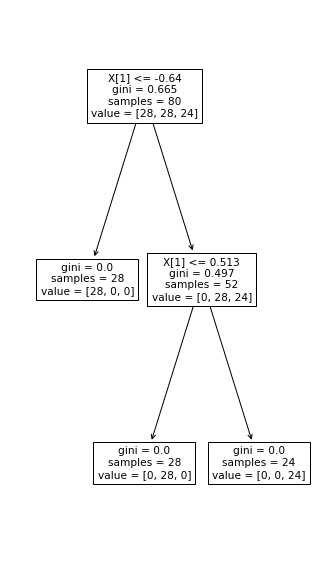

In [112]:
n=int(input("Enter the max_depth:"))
string=input("Enter the criterion(gini/entropy):")
clf=DecisionTreeClassifier(criterion=string,max_depth=n)
clf.fit(X_train,y_train)
rcParams['figure.figsize']=5,10
plot_tree(clf)
plt.show()